In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

In [2]:
mask_image = cv2.imread("Mask_NoMask/train/with_mask/0_0_0 copy 12.jpg")

In [3]:
mask_image = cv2.cvtColor(mask_image,cv2.COLOR_BGR2RGB)

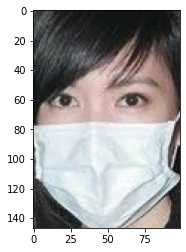

In [4]:
plt.imshow(mask_image)

In [5]:
mask_image.shape

(147, 99, 3)

In [6]:
Nomask_image = cv2.imread("Mask_NoMask/train/without_mask/0_0_aidai_0074.jpg")

In [7]:
Nomask_image = cv2.cvtColor(Nomask_image,cv2.COLOR_BGR2RGB)

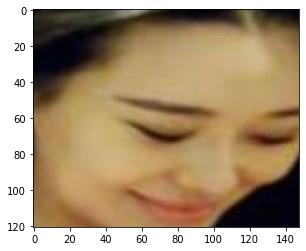

In [8]:
plt.imshow(Nomask_image)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
Image_gen = ImageDataGenerator(rotation_range=25,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode="nearest")

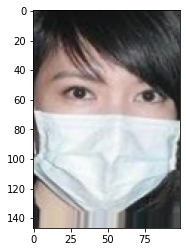

In [11]:
plt.imshow(Image_gen.random_transform(mask_image))

In [12]:
Image_gen.flow_from_directory("Mask_NoMask/train/")

Found 2789 images belonging to 2 classes.


In [13]:
input_shape = (100,100,3)

In [80]:
from keras.models import Sequential
from keras.layers import Activation,Dense,MaxPooling2D,Flatten,Dropout,Conv2D

In [81]:
model = Sequential()

model.add(Conv2D(filters=100,kernel_size=(3,3),input_shape=(100,100,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=200,kernel_size=(3,3),input_shape=(100,100,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=200,kernel_size=(3,3),input_shape=(100,100,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dropout(0.5))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [82]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 98, 98, 100)       2800      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 49, 49, 100)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 47, 47, 200)       180200    
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 23, 23, 200)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 21, 21, 200)       360200    
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 10, 10, 200)       0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 20000)           

In [83]:
batch_size = 19

train_image_gen = Image_gen.flow_from_directory("Mask_NoMask/train/",
                                               target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode="binary")

Found 2789 images belonging to 2 classes.


In [84]:
test_image_gen = Image_gen.flow_from_directory("Mask_NoMask/test/",
                                               target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode="binary")

Found 1044 images belonging to 2 classes.


In [75]:
train_image_gen.class_indices

{'with_mask': 0, 'without_mask': 1}

In [85]:
results = model.fit(train_image_gen,epochs=100,steps_per_epoch=146,
                   validation_data=test_image_gen,validation_steps=12)

Epoch 1/100
 97/146 [==================>...........] - ETA: 11s - loss: 0.3025 - accuracy: 0.8673

/home/bilal/anaconda3/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


146/146 [==============================] - 37s 251ms/step - loss: 0.2687 - accuracy: 0.8910 - val_loss: 0.5740 - val_accuracy: 0.8202
Epoch 2/100
146/146 [==============================] - 36s 250ms/step - loss: 0.1776 - accuracy: 0.9390 - val_loss: 0.5443 - val_accuracy: 0.8377
Epoch 3/100
146/146 [==============================] - 37s 254ms/step - loss: 0.1803 - accuracy: 0.9318 - val_loss: 0.4458 - val_accuracy: 0.8202
Epoch 4/100
146/146 [==============================] - 37s 253ms/step - loss: 0.1730 - accuracy: 0.9477 - val_loss: 0.6829 - val_accuracy: 0.8421
Epoch 5/100
146/146 [==============================] - 36s 247ms/step - loss: 0.1542 - accuracy: 0.9426 - val_loss: 0.6859 - val_accuracy: 0.7851
Epoch 6/100
146/146 [==============================] - 37s 253ms/step - loss: 0.1331 - accuracy: 0.9596 - val_loss: 0.5917 - val_accuracy: 0.7939
Epoch 7/100
146/146 [==============================] - 37s 251ms/step - loss: 0.1372 - accuracy: 0.9581 - val_loss: 0.5583 - val_accurac

In [86]:
results.history["accuracy"]

[0.8909747004508972,
 0.9389891624450684,
 0.9317689538002014,
 0.9476534128189087,
 0.9425992965698242,
 0.9595667719841003,
 0.958122730255127,
 0.9447653293609619,
 0.9552346467971802,
 0.9552346467971802,
 0.9566786885261536,
 0.9646209478378296,
 0.966064989566803,
 0.9653429388999939,
 0.9682310223579407,
 0.9657039642333984,
 0.9678700566291809,
 0.9610108137130737,
 0.9657039642333984,
 0.9685920476913452,
 0.9675090312957764,
 0.9725631475448608,
 0.9703971147537231,
 0.9696750640869141,
 0.9736462235450745,
 0.9761732816696167,
 0.9744051694869995,
 0.9696750640869141,
 0.9722021818161011,
 0.9729241728782654,
 0.9675090312957764,
 0.9758122563362122,
 0.9703971147537231,
 0.9722021818161011,
 0.9718411564826965,
 0.9765343070030212,
 0.9711191058158875,
 0.9747292399406433,
 0.9768953323364258,
 0.9801443815231323,
 0.9801443815231323,
 0.9787003397941589,
 0.9743682146072388,
 0.9808664321899414,
 0.9801443815231323,
 0.9805054068565369,
 0.9797834157943726,
 0.979061365127

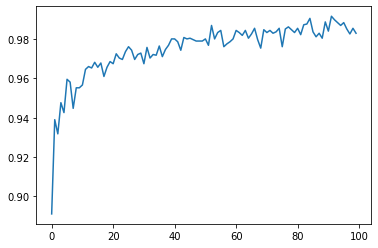

In [87]:
plt.plot(results.history["accuracy"])

In [88]:
model.save("Mask_noMask_model.h5")

In [114]:
Nomask_file = "Mask_NoMask/test/without_mask/188.jpg"

In [115]:
from keras.preprocessing import image

In [116]:
nomask_image = image.load_img(Nomask_file,target_size=(100,100))

In [117]:
nomask_image = image.img_to_array(nomask_image)

In [118]:
nomask_image.shape

(100, 100, 3)

In [119]:
import numpy as np

In [120]:
nomask_image = np.expand_dims(nomask_image,axis=0)

In [121]:
nomask_image.shape

(1, 100, 100, 3)

In [122]:
nomask_image = nomask_image/255

In [123]:
x = model.predict_classes(nomask_image)
if x == 0:
    print("person is with mask")
elif x ==1:
    print("no mask found")
else:
    print("can not identity")

person is with mask


In [124]:
model.predict(nomask_image)

array([[0.00178933]], dtype=float32)